In [ ]:
import pandas as pd
import numpy as np
# Load the weather data
df = pd.read_csv('/content/1. Weather Data.csv')

# Display basic information
print(df.head())
print(df.info())

# Check for null values
print(df.isnull().sum())
df.dropna(inplace=True)  # Drop rows with NaN


       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   obje

In [ ]:
# Example: Adding dummy coordinates for demonstration
# You should replace this with your actual latitude and longitude data
df['Latitude'] = np.random.uniform(-90, 90, df.shape[0])  # Replace with actual data
df['Longitude'] = np.random.uniform(-180, 180, df.shape[0])  # Replace with actual data


In [ ]:
import geopandas as gpd

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))


In [ ]:
# Calculate average temperature for each weather condition
avg_temp = gdf.groupby('Weather')['Temp_C'].mean().reset_index()
print(avg_temp)


                                    Weather     Temp_C
0                                     Clear   6.825716
1                                    Cloudy   7.970544
2                                   Drizzle   7.353659
3                               Drizzle,Fog   8.067500
4                   Drizzle,Ice Pellets,Fog   0.400000
5                              Drizzle,Snow   1.050000
6                          Drizzle,Snow,Fog   0.693333
7                                       Fog   4.303333
8                          Freezing Drizzle  -5.657143
9                      Freezing Drizzle,Fog  -2.533333
10                    Freezing Drizzle,Haze  -5.433333
11                    Freezing Drizzle,Snow  -5.109091
12                             Freezing Fog  -7.575000
13                            Freezing Rain  -3.885714
14                        Freezing Rain,Fog  -2.225000
15                       Freezing Rain,Haze  -4.900000
16            Freezing Rain,Ice Pellets,Fog  -2.600000
17        

(8784, 8)
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


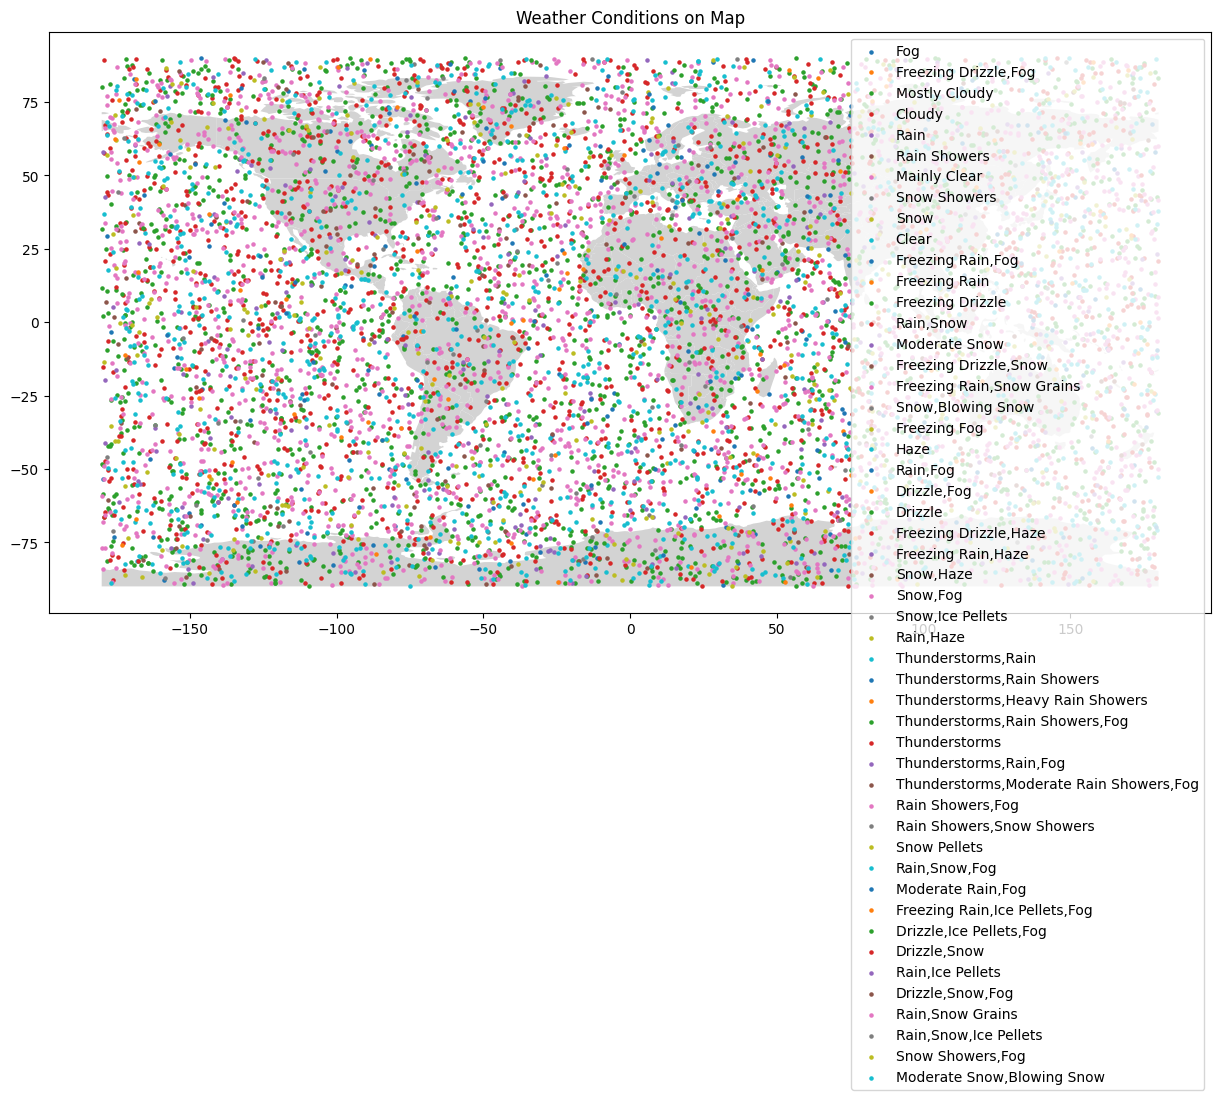

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

# Step 1: Load the weather data
df = pd.read_csv('/content/1. Weather Data.csv')

# Step 2: Check for necessary columns and handle them
print(df.shape)
print(df.isnull().sum())
df.dropna(inplace=True)  # Drop rows with NaN

# Add Latitude and Longitude (replace these with your actual data)
df['Latitude'] = np.random.uniform(-90, 90, df.shape[0])  # Example only
df['Longitude'] = np.random.uniform(-180, 180, df.shape[0])  # Example only

# Step 3: Download and load the world map
url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall('naturalearth_data')

# Load the world map from the extracted shapefile
world = gpd.read_file('naturalearth_data/ne_110m_admin_0_countries.shp')

# Step 4: Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Step 5: Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# Plot weather data
for condition in gdf['Weather'].unique():
    gdf[gdf['Weather'] == condition].plot(ax=ax, marker='o', markersize=5, label=condition)

plt.title('Weather Conditions on Map')
plt.legend()
plt.show()


Data Loaded Successfully.
Null Values in Each Column:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64
Average Temperature by Weather Condition:
                                    Weather     Temp_C
0                                     Clear   6.825716
1                                    Cloudy   7.970544
2                                   Drizzle   7.353659
3                               Drizzle,Fog   8.067500
4                   Drizzle,Ice Pellets,Fog   0.400000
5                              Drizzle,Snow   1.050000
6                          Drizzle,Snow,Fog   0.693333
7                                       Fog   4.303333
8                          Freezing Drizzle  -5.657143
9                      Freezing Drizzle,Fog  -2.533333
10                    Freezing Drizzle,Haze  -5.433333
11                    Freezing Drizzle,Snow  -5.109091


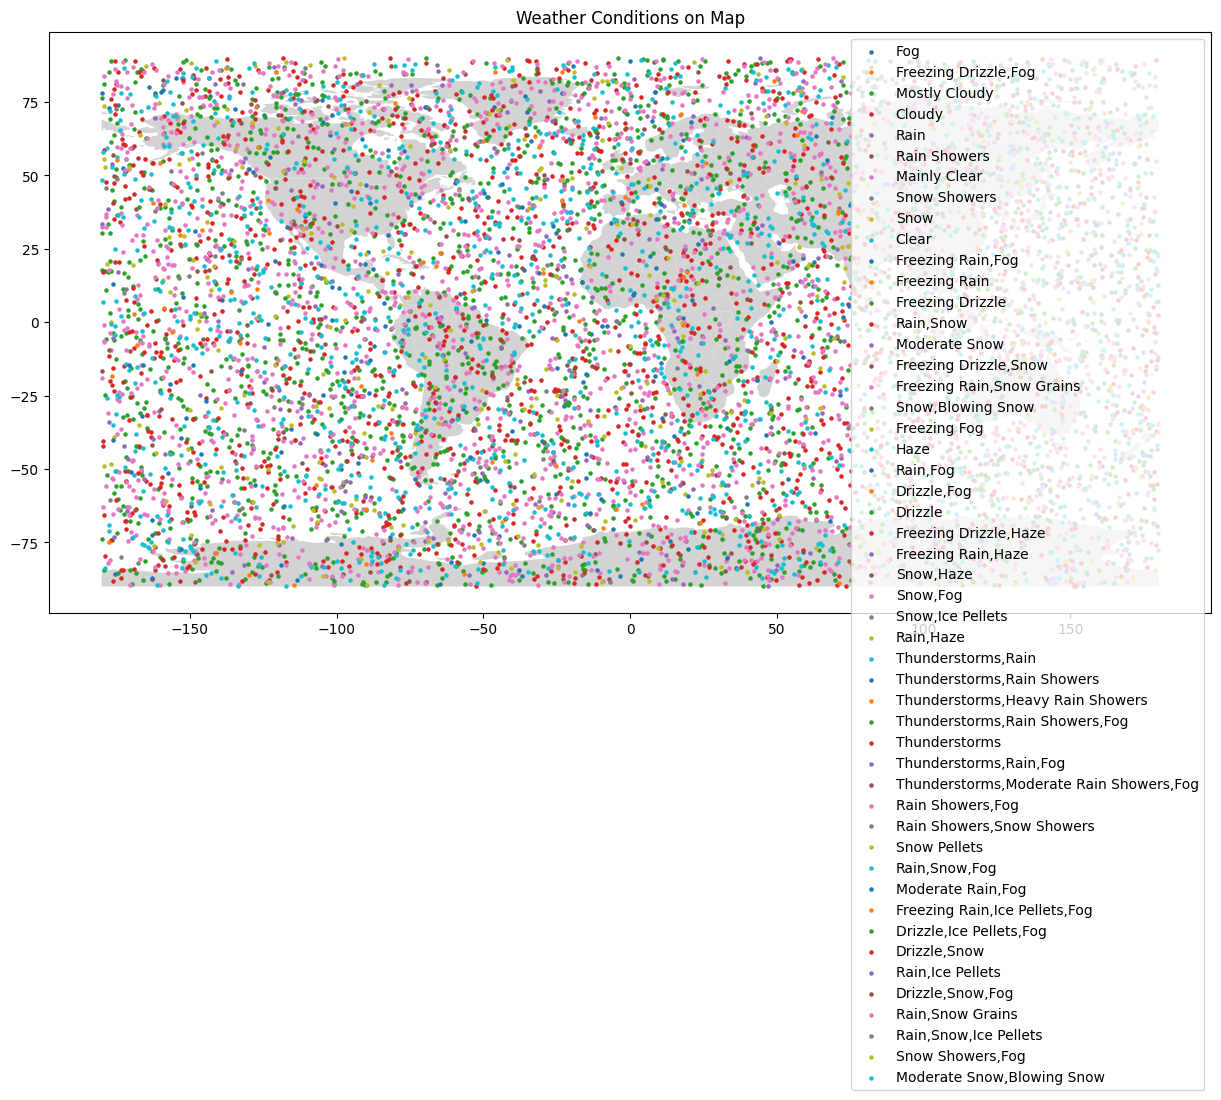

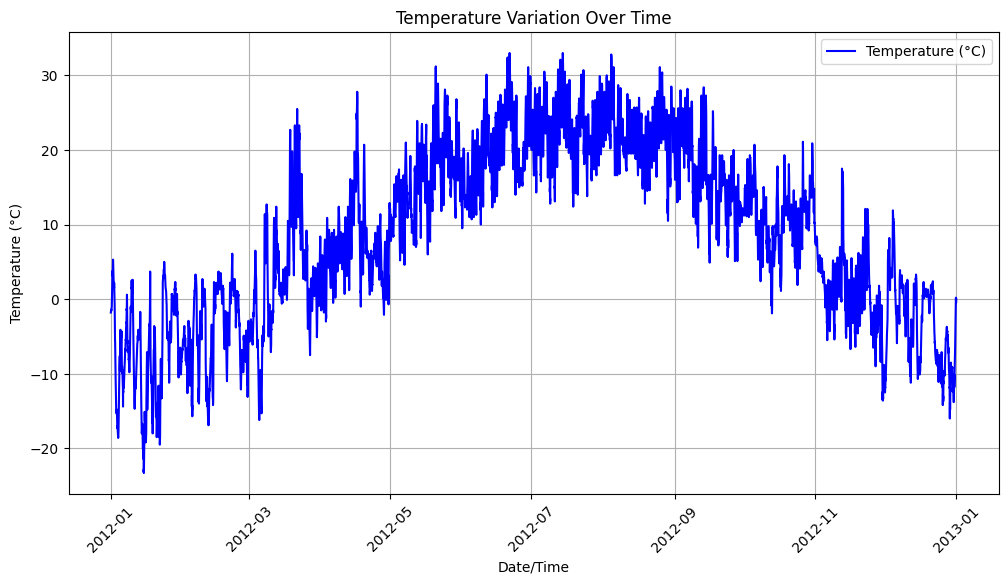

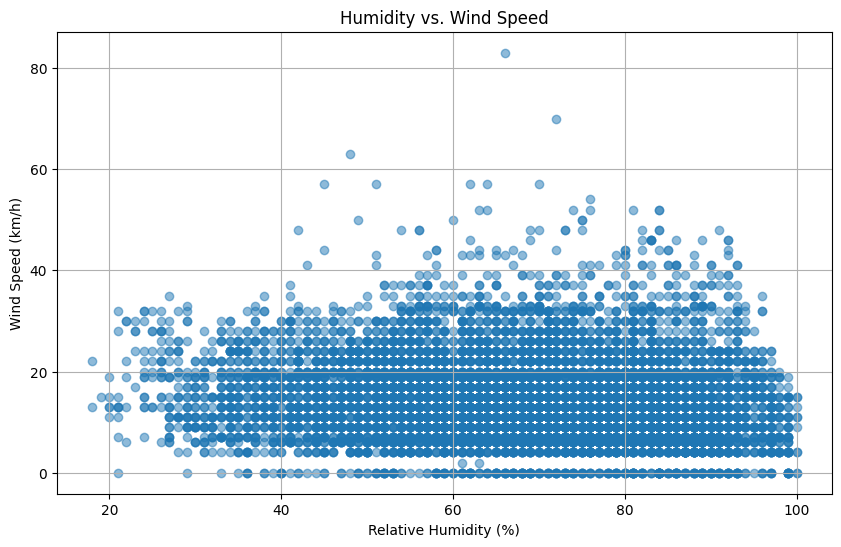

In [ ]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
import io

# Step 1: Load Weather Data
def load_weather_data(file_path):
    df = pd.read_csv(file_path)
    print("Data Loaded Successfully.")
    return df

# Step 2: Data Preparation
def prepare_data(df):
    # Check for null values
    print("Null Values in Each Column:")
    print(df.isnull().sum())

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Add Latitude and Longitude (replace this with your actual data)
    # For demonstration, I'm adding random coordinates
    df['Latitude'] = np.random.uniform(-90, 90, df.shape[0])  # Replace with actual data
    df['Longitude'] = np.random.uniform(-180, 180, df.shape[0])  # Replace with actual data

    return df

# Step 3: Create GeoDataFrame
def create_geodataframe(df):
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
    return gdf

# Step 4: Analyze Weather Conditions
def analyze_weather_conditions(gdf):
    avg_temp = gdf.groupby('Weather')['Temp_C'].mean().reset_index()
    print("Average Temperature by Weather Condition:")
    print(avg_temp)

# Step 5: Visualize Weather Conditions on a Map
def visualize_weather_conditions(gdf):
    # Load world map
    url = 'https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip'
    response = requests.get(url)
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        z.extractall('naturalearth_data')

    world = gpd.read_file('naturalearth_data/ne_110m_admin_0_countries.shp')

    # Create plot
    fig, ax = plt.subplots(figsize=(15, 10))
    world.plot(ax=ax, color='lightgrey')

    # Plot weather data
    for condition in gdf['Weather'].unique():
        gdf[gdf['Weather'] == condition].plot(ax=ax, marker='o', markersize=5, label=condition)

    plt.title('Weather Conditions on Map')
    plt.legend()
    plt.show()

# Step 6: Temporal Analysis
def plot_temperature_over_time(df):
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])  # Convert to datetime
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date/Time'], df['Temp_C'], label='Temperature (°C)', color='blue')
    plt.title('Temperature Variation Over Time')
    plt.xlabel('Date/Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.show()

# Step 7: Correlation Analysis
def plot_humidity_vs_wind_speed(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Rel Hum_%'], df['Wind Speed_km/h'], alpha=0.5)
    plt.title('Humidity vs. Wind Speed')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Wind Speed (km/h)')
    plt.grid()
    plt.show()

# Main function to run the analysis
def main():
    # Load data
    file_path = '/content/1. Weather Data.csv'  # Update with your actual file path
    df = load_weather_data(file_path)

    # Prepare data
    df = prepare_data(df)

    # Create GeoDataFrame
    gdf = create_geodataframe(df)

    # Analyze weather conditions
    analyze_weather_conditions(gdf)

    # Visualize weather conditions
    visualize_weather_conditions(gdf)

    # Plot temperature over time
    plot_temperature_over_time(df)

    # Plot humidity vs. wind speed
    plot_humidity_vs_wind_speed(df)

# Run the main function
if __name__ == "__main__":
    main()
